Student: Hung Trinh

ID: 2307229

Note: this code is run on google colab

### Step 0: Prepare dataset


0.1. Download dataset from [here](https://github.com/kon172verma/NLP-Natural-Language-Processing/blob/master/2.%20Writing%20like%20Shakespeare/Shakespeare%20Sonnets.txt) to the same folder

0.2. Load the dataset from the same directory

In [1]:
from scipy.stats import entropy

In [2]:
import pandas as pd

# Load the dataset
file_path = 'Shakespeare Sonnets.txt'
with open(file_path, 'r', encoding='utf-8') as f:
    sonnets = f.read()

# Print the first 500 characters to check the data format
print(sonnets[:500])


Come all ye maidens young and fair
And you that are blooming in your prime
Always beware and keep your garden fair
Let no man steal away your thyme
For thyme it is a precious thing
And thyme brings all things to my mind
nlyme with all its flavours, along with all its joys
Thyme, brings all things to my mind
Once I and a bunch of thyme
i thought it never would decay
Then came a lusty sailor
Who chanced to pass my way
And stole my bunch of thyme away
The sailor gave to me a rose
A rose that never 


0.3. Clean the Dataset (no need for now)

In [3]:
import re

def clean_sonnets(text):
    # Remove unwanted characters, extra spaces, and metadata
    cleaned_text = re.sub(r"\n+", "\n", text)  # Remove extra newlines
    cleaned_text = re.sub(r"[^\w\s]", "", cleaned_text)  # Remove punctuation
    cleaned_text = cleaned_text.lower()  # Lowercase everything
    return cleaned_text


cleaned_sonnets = clean_sonnets(sonnets)

# Print the cleaned text for review
print(cleaned_sonnets[:500])

come all ye maidens young and fair
and you that are blooming in your prime
always beware and keep your garden fair
let no man steal away your thyme
for thyme it is a precious thing
and thyme brings all things to my mind
nlyme with all its flavours along with all its joys
thyme brings all things to my mind
once i and a bunch of thyme
i thought it never would decay
then came a lusty sailor
who chanced to pass my way
and stole my bunch of thyme away
the sailor gave to me a rose
a rose that never wo


### Step 1: Explore the distribution of part-of-speech(PoS) tags in line of codes

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

1.1. Determine the PoS tag of every token in each line of the poem

In [5]:
from nltk import pos_tag, word_tokenize

# Split the text into lines
lines = sonnets.split("\n")

# Tag each line with part-of-speech tags
line_pos_tags = [pos_tag(word_tokenize(line)) for line in lines]

# Display PoS tags for each lines
for i, tags in enumerate(line_pos_tags):
    print(f"Line {i+1}: {tags}")

Line 1: [('Come', 'NNP'), ('all', 'DT'), ('ye', 'NN'), ('maidens', 'NNS'), ('young', 'JJ'), ('and', 'CC'), ('fair', 'JJ')]
Line 2: [('And', 'CC'), ('you', 'PRP'), ('that', 'WDT'), ('are', 'VBP'), ('blooming', 'VBG'), ('in', 'IN'), ('your', 'PRP$'), ('prime', 'NN')]
Line 3: [('Always', 'NNS'), ('beware', 'NN'), ('and', 'CC'), ('keep', 'VB'), ('your', 'PRP$'), ('garden', 'NN'), ('fair', 'NN')]
Line 4: [('Let', 'VB'), ('no', 'DT'), ('man', 'NN'), ('steal', 'VB'), ('away', 'RB'), ('your', 'PRP$'), ('thyme', 'NN')]
Line 5: [('For', 'IN'), ('thyme', 'NN'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('precious', 'JJ'), ('thing', 'NN')]
Line 6: [('And', 'CC'), ('thyme', 'VB'), ('brings', 'NNS'), ('all', 'DT'), ('things', 'NNS'), ('to', 'TO'), ('my', 'PRP$'), ('mind', 'NN')]
Line 7: [('nlyme', 'NN'), ('with', 'IN'), ('all', 'DT'), ('its', 'PRP$'), ('flavours', 'NNS'), (',', ','), ('along', 'IN'), ('with', 'IN'), ('all', 'DT'), ('its', 'PRP$'), ('joys', 'NNS')]
Line 8: [('Thyme', 'NNP'), (',', '

1.2. Calculate the number of distinct PoS tags in each line

In [6]:
# Calculate the number of distinct PoS tags for each line
distinct_pos_counts = [len(set(tag for _, tag in line)) for line in line_pos_tags]

# Print the distinct PoS tag count for the all lines
for i, count in enumerate(distinct_pos_counts):
    print(f"Line {i+1} has {count} distinct PoS tags.")

Line 1 has 6 distinct PoS tags.
Line 2 has 8 distinct PoS tags.
Line 3 has 5 distinct PoS tags.
Line 4 has 5 distinct PoS tags.
Line 5 has 6 distinct PoS tags.
Line 6 has 7 distinct PoS tags.
Line 7 has 6 distinct PoS tags.
Line 8 has 8 distinct PoS tags.
Line 9 has 6 distinct PoS tags.
Line 10 has 6 distinct PoS tags.
Line 11 has 5 distinct PoS tags.
Line 12 has 6 distinct PoS tags.
Line 13 has 6 distinct PoS tags.
Line 14 has 5 distinct PoS tags.
Line 15 has 6 distinct PoS tags.
Line 16 has 5 distinct PoS tags.
Line 17 has 7 distinct PoS tags.
Line 18 has 5 distinct PoS tags.
Line 19 has 3 distinct PoS tags.
Line 20 has 10 distinct PoS tags.
Line 21 has 9 distinct PoS tags.
Line 22 has 6 distinct PoS tags.
Line 23 has 5 distinct PoS tags.
Line 24 has 8 distinct PoS tags.
Line 25 has 5 distinct PoS tags.
Line 26 has 6 distinct PoS tags.
Line 27 has 9 distinct PoS tags.
Line 28 has 6 distinct PoS tags.
Line 29 has 6 distinct PoS tags.
Line 30 has 4 distinct PoS tags.
Line 31 has 6 dist

1.3. Plotting PoS tag frequency for the beginning of the poem using bar graph

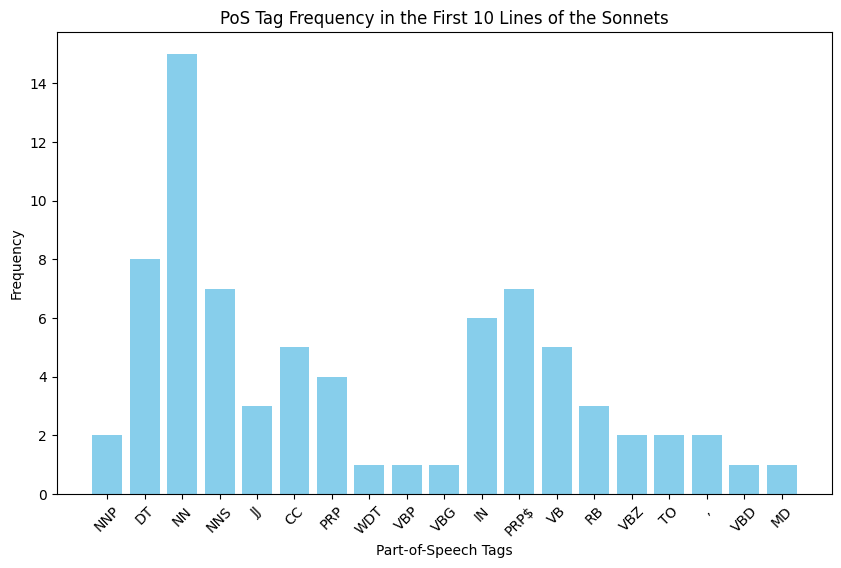

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# Get PoS tags for the first 10 lines
first_10_lines_tags = [tag for line in line_pos_tags[:10] for _, tag in line]
pos_counts_first_10 = Counter(first_10_lines_tags)

# Plot the PoS tag distribution for the first 10 lines
plt.figure(figsize=(10, 6))
plt.bar(pos_counts_first_10.keys(), pos_counts_first_10.values(), color="skyblue")
plt.title("PoS Tag Frequency in the First 10 Lines of the Sonnets")
plt.xlabel("Part-of-Speech Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

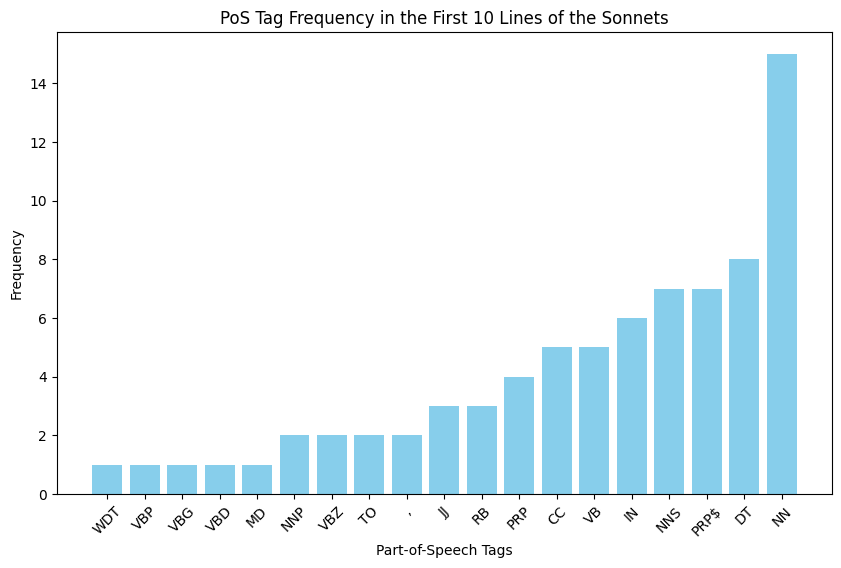

In [62]:
# Get PoS tags for the first 10 lines
first_10_lines_tags = [tag for line in line_pos_tags[:10] for _, tag in line]
pos_counts_first_10 = Counter(first_10_lines_tags)

# Sort POS tags by frequency in ascending order
sorted_pos_counts = dict(sorted(pos_counts_first_10.items(), key=lambda item: item[1]))
# Plot the PoS tag distribution for the first 10 lines
plt.figure(figsize=(10, 6))
plt.bar(sorted_pos_counts.keys(), sorted_pos_counts.values(), color="skyblue")
plt.title("PoS Tag Frequency in the First 10 Lines of the Sonnets")
plt.xlabel("Part-of-Speech Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

1.4. Plotting frequency of each PoS tag across the Poem

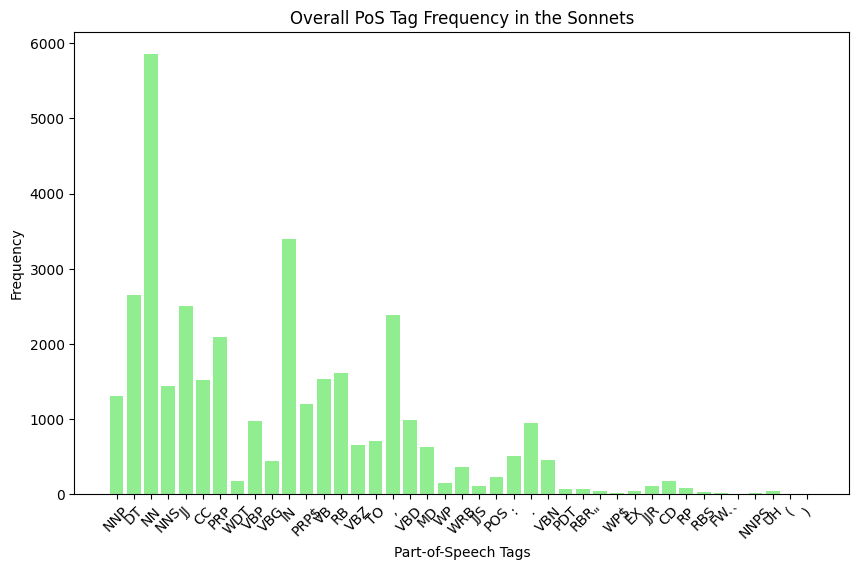

In [ ]:
# Get all PoS tags from the entire poem
all_tags = [tag for line in line_pos_tags for _, tag in line]
overall_pos_counts = Counter(all_tags)

# Plot the overall PoS tag frequency for the entire poem
plt.figure(figsize=(10, 6))
plt.bar(overall_pos_counts.keys(), overall_pos_counts.values(), color="lightgreen")
plt.title("Overall PoS Tag Frequency in the Sonnets")
plt.xlabel("Part-of-Speech Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

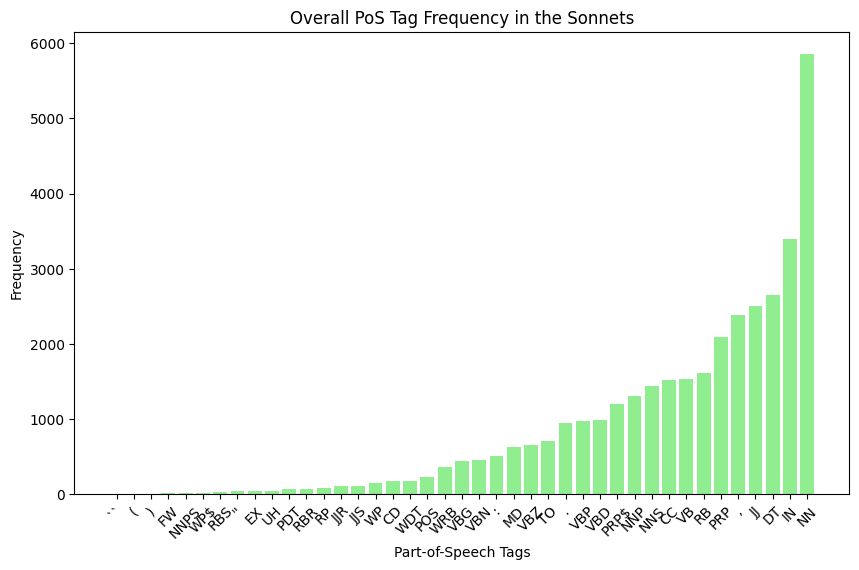

In [63]:
# Flatten all POS tags in the poem
all_tags = [tag for line in line_pos_tags for _, tag in line]
overall_pos_counts = Counter(all_tags)

# Sort POS tags by frequency in ascending order
sorted_pos_counts = dict(sorted(overall_pos_counts.items(), key=lambda item: item[1]))

# Plot the sorted overall POS tag frequency
plt.figure(figsize=(10, 6))
plt.bar(sorted_pos_counts.keys(), sorted_pos_counts.values(), color="lightgreen")
plt.title("Overall PoS Tag Frequency in the Sonnets")
plt.xlabel("Part-of-Speech Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

### Step 2: Analyze word frequency

2.1. Identify the 30 most frequent words

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist


# Tokenize and filter out stopwords
tokens = word_tokenize(sonnets)
stop_words = set(stopwords.words("english"))
filtered_tokens = [
    word
    for word in tokens
    if word.lower() not in stop_words and word.isalpha()  # Only keep alphabetic words
]


# Get the most common words

word_frequencies = FreqDist(filtered_tokens)

most_common_filtered_words = word_frequencies.most_common(30)


# Extract the words only (for further processing)

most_common_words = [word for word, _ in most_common_filtered_words]


# Display the 30 most common words

print("Most common words:", most_common_words)

Most common words: ['love', 'thy', 'thou', 'thee', 'heart', 'doth', 'sweet', 'one', 'old', 'beauty', 'eyes', 'shall', 'fair', 'mine', 'true', 'see', 'time', 'art', 'still', 'day', 'Ill', 'away', 'night', 'like', 'never', 'make', 'Oh', 'eye', 'world', 'thine']


      Word  Occurrences POS Tag
0     love          253     VBP
1      thy          249      JJ
2     thou          223      NN
3     thee          173      NN
4    heart           95      NN
5     doth           82      NN
6    sweet           77      JJ
7      one           77      CD
8      old           72      JJ
9   beauty           71      NN
10    eyes           69     NNS
11   shall           64      MD
12    fair           63      JJ
13    mine           59      NN
14    true           59      JJ
15     see           57      NN
16    time           56      NN
17     art           55      NN
18   still           51      RB
19     day           50      NN
20     Ill           50      NN
21    away           48      RB
22   night           48      NN
23    like           48      IN
24   never           47      RB
25    make           47     VBP
26      Oh           47     NNP
27     eye           46      NN
28   world           44      NN
29   thine           42      JJ


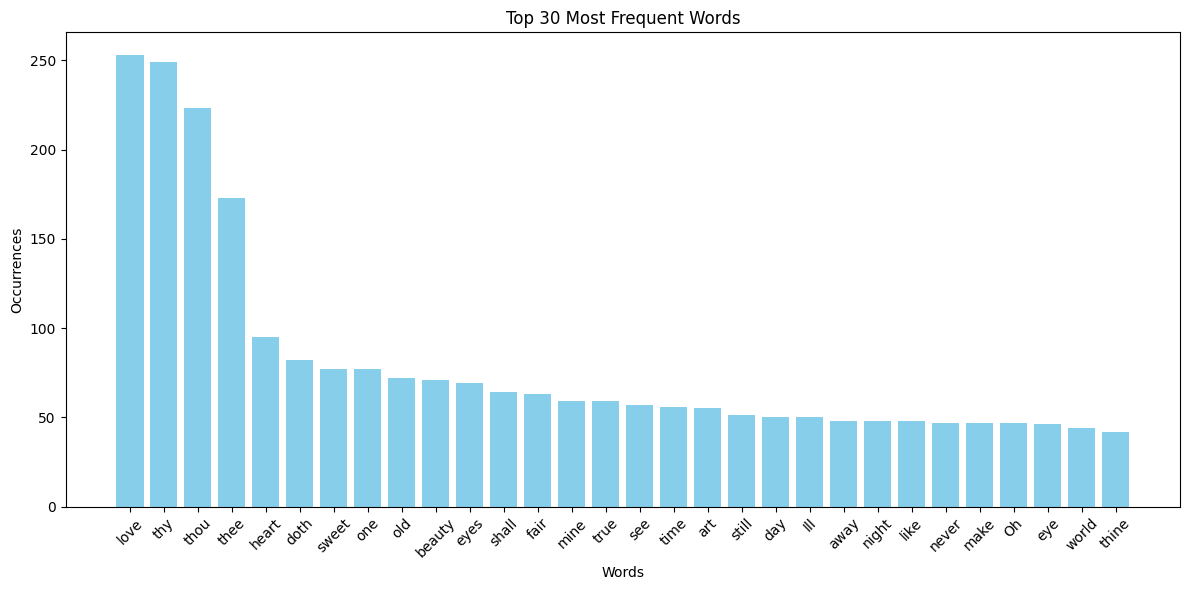

In [67]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
import string

# Assuming 'sonnets' contains your text
# Tokenize and filter out stopwords and punctuation
tokens = word_tokenize(sonnets)
stop_words = set(stopwords.words("english"))
filtered_tokens = [
    word
    for word in tokens
    if word.lower() not in stop_words and word.isalpha()  # Only keep alphabetic words
]

# Get the POS tags for the filtered tokens
pos_tags = pos_tag(filtered_tokens)

# Get the frequency distribution of words
word_frequencies = FreqDist(filtered_tokens)
most_common_filtered_words = word_frequencies.most_common(30)

# Prepare data for DataFrame
data = []
for word, _ in most_common_filtered_words:
    # Find the first POS tag for the word from the pos_tags list
    pos = next((tag for w, tag in pos_tags if w.lower() == word.lower()), None)
    data.append((word, _, pos))

# Create a DataFrame for better display
df = pd.DataFrame(data, columns=["Word", "Occurrences", "POS Tag"])

# Display the 30 most common words in table format
print(df)

# Create a bar graph for words and occurrences
plt.figure(figsize=(12, 6))
plt.bar(df["Word"], df["Occurrences"], color="skyblue")
plt.xlabel("Words")
plt.ylabel("Occurrences")
plt.title("Top 30 Most Frequent Words")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()

2.2. Get PoS tags for the 30 most frequent words

In [71]:
from nltk import pos_tag

# Tag the most common words with PoS tags
word_pos_tags = pos_tag(most_common_words)

# Create a dictionary with words and their PoS tags
word_pos_dict = {word: tag for word, tag in word_pos_tags}

# Display the PoS tags for the most common words
print("PoS Tags:", word_pos_dict)

PoS Tags: {'love': 'VB', 'thy': 'JJ', 'thou': 'NN', 'thee': 'JJ', 'heart': 'NN', 'doth': 'VBZ', 'sweet': 'JJ', 'one': 'CD', 'old': 'JJ', 'beauty': 'NN', 'eyes': 'NNS', 'shall': 'MD', 'fair': 'VB', 'mine': 'JJ', 'true': 'JJ', 'see': 'NN', 'time': 'NN', 'art': 'VB', 'still': 'RB', 'day': 'NN', 'Ill': 'NNP', 'away': 'RB', 'night': 'NN', 'like': 'IN', 'never': 'RB', 'make': 'VBP', 'Oh': 'UH', 'eye': 'NN', 'world': 'NN', 'thine': 'NN'}


2.3. Identify the position of each word in the Poem line

In [74]:
# Split the text into lines
lines = sonnets.split("\n")

# Dictionary to store positions of each word in each line
word_positions = {word: [] for word in most_common_words}

# Loop through each line and find positions of the words
for line_index, line in enumerate(lines):
    words_in_line = line.lower().split()  # Lowercase for consistent matching
    for word in most_common_words:
        positions_in_line = [i for i, w in enumerate(words_in_line) if w.lower() == word.lower()]
        if positions_in_line:
            # Store (line number, position in line)
            word_positions[word].extend(
                [(line_index + 1, pos + 1) for pos in positions_in_line]
            )

# Display positions for each of 30 words
# Each position are in form of (a, b) where a is the line and b is the b_th word of that line
for word, positions in list(word_positions.items()):
    print(f"Positions for '{word}': {positions}")

Positions for 'love': [(144, 2), (146, 7), (158, 6), (228, 8), (288, 2), (302, 4), (312, 6), (341, 4), (343, 7), (371, 5), (385, 10), (427, 4), (445, 4), (448, 4), (451, 7), (467, 7), (483, 6), (497, 9), (510, 7), (525, 6), (534, 4), (560, 4), (571, 9), (573, 5), (573, 8), (574, 7), (579, 3), (600, 4), (602, 3), (602, 9), (644, 5), (666, 7), (670, 4), (674, 6), (697, 4), (708, 4), (723, 4), (732, 5), (800, 4), (819, 6), (872, 4), (873, 4), (891, 3), (916, 8), (932, 6), (946, 8), (1008, 8), (1014, 4), (1018, 9), (1025, 5), (1026, 4), (1030, 6), (1043, 7), (1044, 2), (1082, 4), (1086, 4), (1142, 6), (1209, 8), (1268, 5), (1291, 2), (1299, 7), (1300, 6), (1313, 4), (1320, 6), (1365, 6), (1422, 3), (1426, 7), (1438, 2), (1439, 2), (1440, 2), (1442, 2), (1480, 4), (1484, 4), (1510, 8), (1517, 2), (1525, 5), (1530, 4), (1534, 6), (1578, 2), (1609, 4), (1621, 8), (1629, 8), (1632, 1), (1635, 3), (1635, 6), (1644, 1), (1650, 5), (1727, 7), (1746, 4), (1748, 5), (1836, 2), (1840, 8), (1847, 9),

2.4. Visualize Frequency and Word Positions

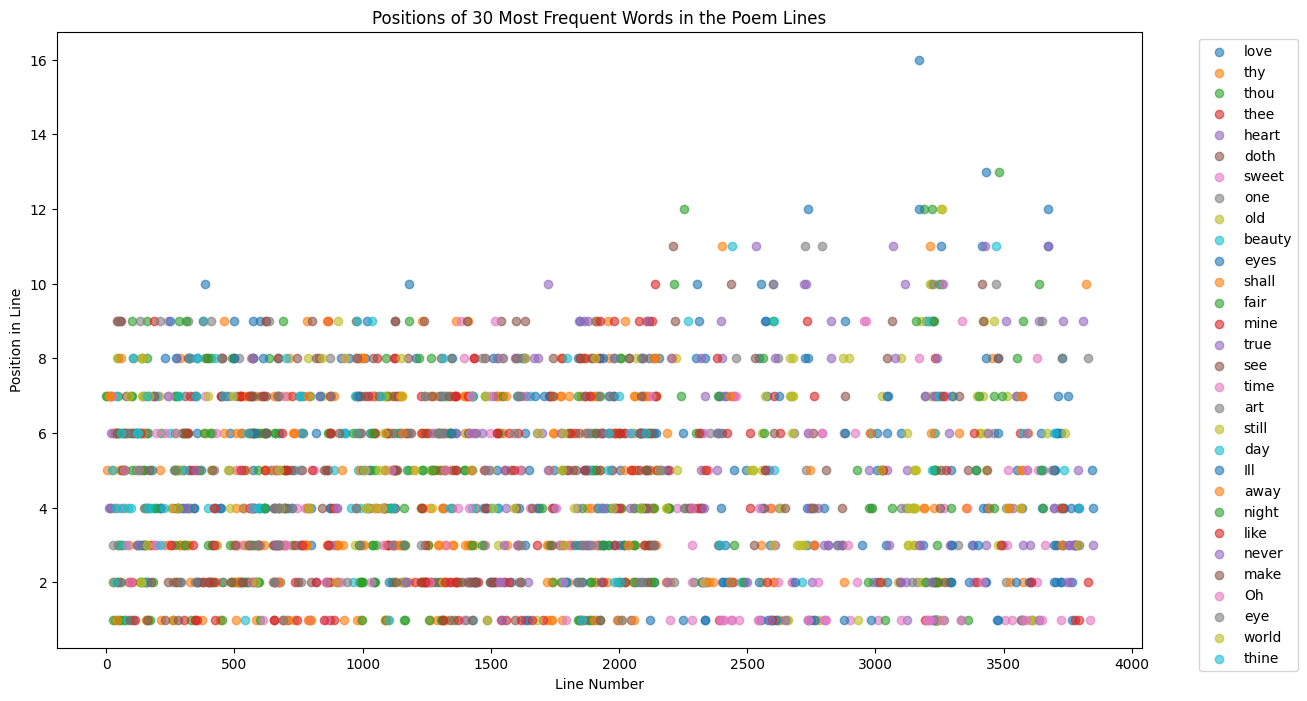

In [75]:
import matplotlib.pyplot as plt

# Prepare the data for visualization
plt.figure(figsize=(14, 8))
for word, positions in word_positions.items():
    # Extract line numbers and positions in line for the word
    line_numbers = [pos[0] for pos in positions]
    word_positions_in_line = [pos[1] for pos in positions]

    # Scatter plot for word positions (x = line number, y = position in line)
    plt.scatter(line_numbers, word_positions_in_line, label=word, alpha=0.6)

# Add plot details
plt.title("Positions of 30 Most Frequent Words in the Poem Lines")
plt.xlabel("Line Number")
plt.ylabel("Position in Line")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

### Step 3: Analyze word repetitions
Evaluate the number of repetitions occurring either within the same line of poem or two successive lines of poem.

* Repetition is the use of the same word, letter, phrase, number of syllables, stanza, or idea, multiple times

3.1. Identify word repititions in either a single line or two consecutive lines

Identify the repetitions in a single line

In [14]:
def count_repetitions(line):
    words = line.lower().split()
    word_counts = Counter(words)
    repetitions = sum(count - 1 for count in word_counts.values() if count > 1)
    return repetitions

# Split the original 'sonnets' text into lines
lines = sonnets.split('\n')

# Calculate repetitions for each line
line_repetitions = [count_repetitions(line) for line in lines]

# Display the repetition counts of first 10 lines
print("Repetitions per line:", line_repetitions[:10])

Repetitions per line: [0, 0, 0, 0, 0, 0, 3, 0, 0, 0]


Identify repititions accross 2 successive lines

In [15]:
# Function to count repetitions across two successive lines
def count_repetitions_between_lines(line1, line2):
    words_line1 = set(line1.lower().split())
    words_line2 = line2.lower().split()
    repetitions = sum(1 for word in words_line2 if word in words_line1)
    return repetitions


# Calculate repetitions for each pair of successive lines
pair_repetitions = [
    count_repetitions_between_lines(lines[i], lines[i + 1])
    for i in range(len(lines) - 1)
]

# Display the first few successive line pair repetition counts
print("Repetitions per successive line pair:", pair_repetitions[:10])

Repetitions per successive line pair: [1, 2, 1, 1, 1, 2, 1, 0, 1, 0]


3.2. Calculate mean, standard deviation, and kurtosis

In [16]:
import numpy as np
from scipy.stats import kurtosis

# Convert to numpy array for easier computation
pair_repetitions_array = np.array(pair_repetitions)

# Calculate mean, standard deviation, and kurtosis
mean_repetitions = np.mean(pair_repetitions_array)
std_dev_repetitions = np.std(pair_repetitions_array)
kurtosis_repetitions = kurtosis(pair_repetitions_array)

print("Mean repetitions per two-successive lines:", mean_repetitions)
print("Standard deviation of repetitions:", std_dev_repetitions)
print("Kurtosis of repetitions:", kurtosis_repetitions)

Mean repetitions per two-successive lines: 0.7411642411642412
Standard deviation of repetitions: 1.0375235869121533
Kurtosis of repetitions: 7.00575305461434


What I can tell about the above mean, sd, and kurtosis is that:
- Mean repetitions is approximately 0.74. This indicates that on average, words in two successive lines are repeated 0.74 times. This is not a significant number, but it indicates that the repetitions are not extremely rare or abundant.
- Standard deviation of repetitions is approximately 1.04. This shows a moderate level of variation in repetition count across line pairs.
- Kurtosis of repetitions is approximately 7. Because 7 > 3, so the data has heavy tails or more extreme outliers than a normal distribution. This means that most line pairs have low or zero repetitions, but there are occasional line pairs with significantly higher counts, contributing to the "heavy tails" in the distribution.

3.3. Draw the distribution plot

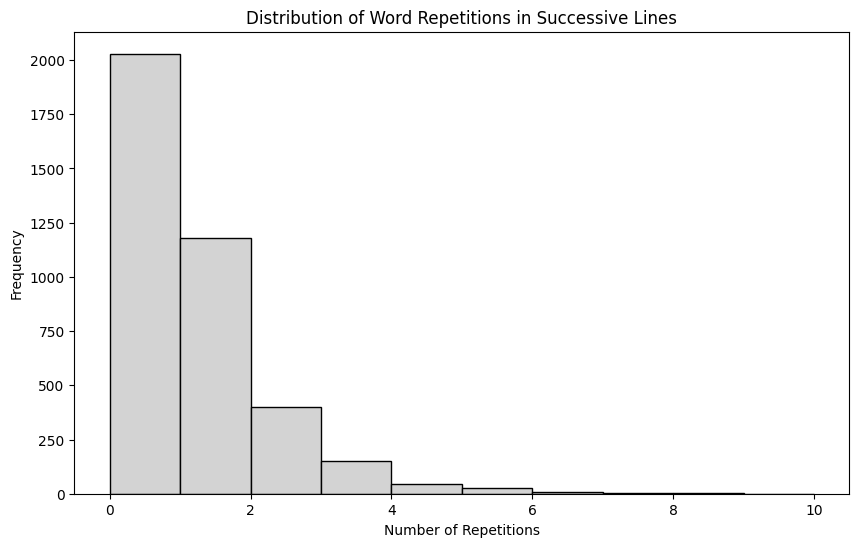

In [17]:
# Plot the distribution of repetitions in successive lines
plt.figure(figsize=(10, 6))
plt.hist(pair_repetitions_array, bins=10, color="lightgray", edgecolor="black")
plt.title("Distribution of Word Repetitions in Successive Lines")
plt.xlabel("Number of Repetitions")
plt.ylabel("Frequency")
plt.show()

### Step 4: Comprehend the occurrence of named-entities acrosss various lines

4.1. Use [spacy name taggers](https://spacy.io/usage/linguistic-features) to check the occurrence of Person/organization/location named-entities in each line

Download spacy

In [18]:
!pip install -U pip setuptools wheel
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


4.2. Extract name-entities by line

As stated by the question, we only focus on PERSON, ORG (organization), and GPE (geopolitical entity, which includes locations)

In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")

# We use lines variable which is line by line of the sonnet dataset
print(lines)

# Initialize a dictionary to store entity counts and their line occurrences
entity_counts = {"PERSON": 0, "ORG": 0, "GPE": 0}
entity_occurrences = {"PERSON": [], "ORG": [], "GPE": []}

# Process each line and extract entities
for line_number, line in enumerate(lines):
    doc = nlp(line)
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            # Increment entity count
            entity_counts[ent.label_] += 1
            # Record the line number where the entity appears
            entity_occurrences[ent.label_].append(
                line_number + 1
            )  # +1 for 1-based indexing

# Display entity counts and occurrences
print("Entity Counts:", entity_counts)
print("Entity Occurrences:", entity_occurrences)

['Come all ye maidens young and fair', 'And you that are blooming in your prime', 'Always beware and keep your garden fair', 'Let no man steal away your thyme', 'For thyme it is a precious thing', 'And thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'Thyme, brings all things to my mind', 'Once I and a bunch of thyme', 'i thought it never would decay', 'Then came a lusty sailor', 'Who chanced to pass my way', 'And stole my bunch of thyme away', 'The sailor gave to me a rose', 'A rose that never would decay', 'He gave it to me to keep me reminded', 'Of when he stole my thyme away', 'Sleep, my child, and peace attend thee', 'All through the night', 'Guardian angels God will send theeFROM fairest creatures we desire increase,', "That thereby beauty's rose might never die,", 'But as the riper should by time decease,', 'His tender heir might bear his memory:', 'But thou, contracted to thine own bright eyes,', "Feed'st thy light'st flame with self-

4.3. Display a histogram showing the frquency of each type of named-entities (PERSON, ORG, GPE) occured in the whole dataset.

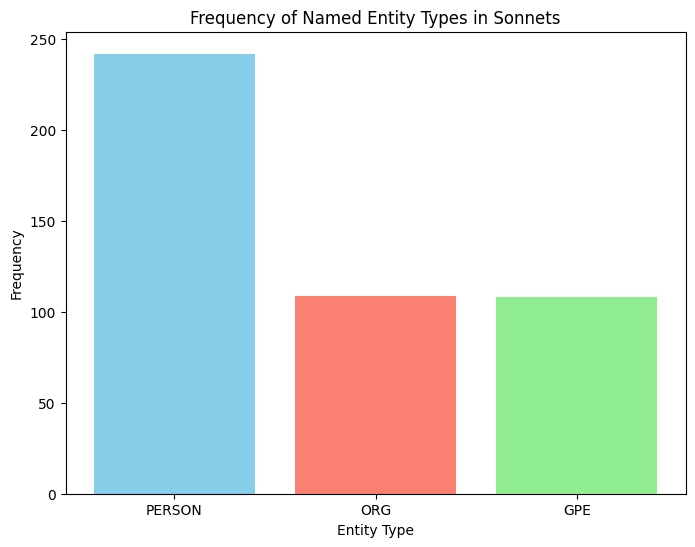

In [20]:
# Plot the histogram for named entity frequencies
plt.figure(figsize=(8, 6))
plt.bar(
    entity_counts.keys(),
    entity_counts.values(),
    color=["skyblue", "salmon", "lightgreen"],
)
plt.title("Frequency of Named Entity Types in Sonnets")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.show()

Plot line numbers for entity occurrences

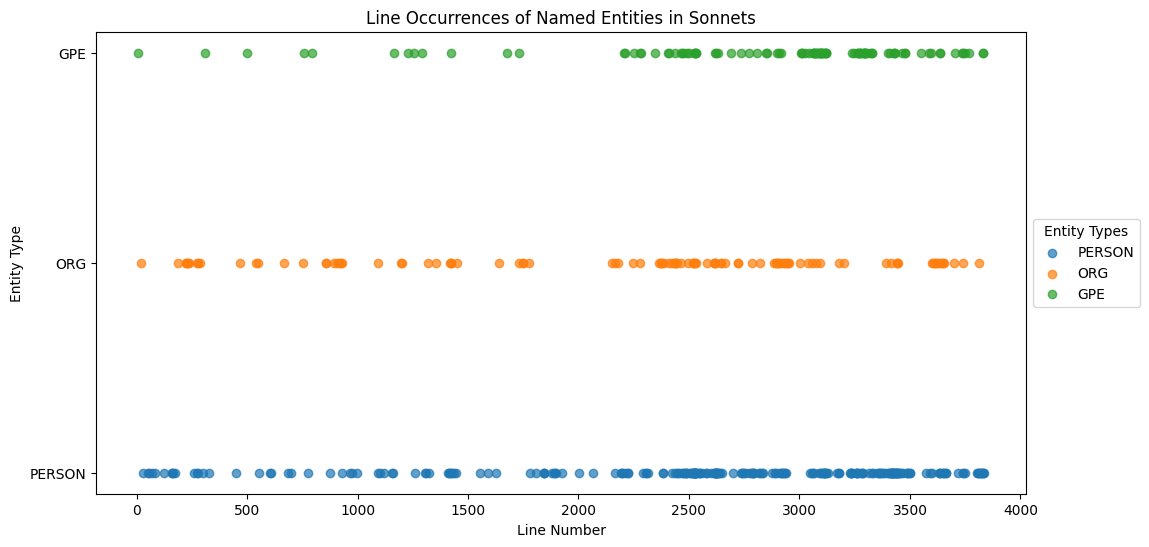

In [21]:
# Plot the line numbers where each entity type occurs
plt.figure(figsize=(12, 6))

# Scatter plot for each entity type
for entity, line_numbers in entity_occurrences.items():
    plt.scatter(line_numbers, [entity] * len(line_numbers), label=entity, alpha=0.7)

# Add plot details
plt.title("Line Occurrences of Named Entities in Sonnets")
plt.xlabel("Line Number")
plt.ylabel("Entity Type")
plt.legend(title="Entity Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

### Step 5: Investigate the emotion coveyed by the poetry

5.1. Download the [EmoTag1200 lexicon](https://github.com/abushoeb/EmoTag/blob/master/data/EmoTag1200-scores.csv) to the same working directory

We have eight motion state: (anger, anticipation, disgust, fear, joy, sadness, surprise, trust)

In [22]:
import pandas as pd

# Load the EmoTag1200 lexicon
lexicon_path = "EmoTag1200-scores.csv"  # Update this with the actual path
lexicon_df = pd.read_csv(lexicon_path)

# Display the first few rows of the lexicon to understand its structure
print(lexicon_df.head())

# Create a dictionary mapping each term to its scores for quick lookups
emotion_lexicon = {row["name"]: row[1:].to_dict() for _, row in lexicon_df.iterrows()}

  unicode emoji           name  anger  anticipation  disgust  fear   joy  \
0   1F308     🌈        rainbow   0.00          0.28     0.00  0.00  0.69   
1   1F319     🌙  crescent moon   0.00          0.31     0.00  0.00  0.25   
2   1F31A     🌚  new moon face   0.06          0.08     0.17  0.06  0.42   
3   1F31E     🌞  sun with face   0.00          0.22     0.00  0.00  0.78   
4   1F31F     🌟   glowing star   0.00          0.28     0.00  0.00  0.53   

   sadness  surprise  trust  
0     0.06      0.22   0.33  
1     0.00      0.06   0.25  
2     0.19      0.06   0.11  
3     0.00      0.11   0.22  
4     0.00      0.25   0.31  


5.2. Identifiy the relevant lexicon terms from the poem

In [23]:
# Tokenize the poem and keep only unique words for efficiency
poem_words = set(word.lower() for word in word_tokenize(sonnets) if word.isalpha())

# Filter poem words to get only those in the EmoTag lexicon
relevant_words = {
    word: emotion_lexicon[word] for word in poem_words if word in emotion_lexicon
}

# Display the relevant words and their emotion scores
print("Relevant words with emotion scores:")
[print(f"{key}: {value}") for key, value in relevant_words.items()]

print("Size of relevant words: ", len(relevant_words))

Relevant words with emotion scores:
eyes: {'emoji': '👀', 'name': 'eyes', 'anger': 0.14, 'anticipation': 0.81, 'disgust': 0.17, 'fear': 0.42, 'joy': 0.0, 'sadness': 0.17, 'surprise': 0.64, 'trust': 0.06}
tongue: {'emoji': '👅', 'name': 'tongue', 'anger': 0.0, 'anticipation': 0.17, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.36, 'sadness': 0.0, 'surprise': 0.08, 'trust': 0.11}
sun: {'emoji': '☀', 'name': 'sun', 'anger': 0.0, 'anticipation': 0.22, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.44, 'sadness': 0.0, 'surprise': 0.06, 'trust': 0.14}
crown: {'emoji': '👑', 'name': 'crown', 'anger': 0.0, 'anticipation': 0.25, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.28, 'sadness': 0.0, 'surprise': 0.11, 'trust': 0.25}
pistol: {'emoji': '🔫', 'name': 'pistol', 'anger': 0.44, 'anticipation': 0.14, 'disgust': 0.17, 'fear': 0.14, 'joy': 0.03, 'sadness': 0.14, 'surprise': 0.0, 'trust': 0.11}
star: {'emoji': '⭐', 'name': 'star', 'anger': 0.0, 'anticipation': 0.17, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.39, 'sadness': 0.0,

5.3. PLot 2D graph for (anger, joy) and (fear, surprise)

In [24]:
# Prepare data for the Anger vs Joy and Fear vs Surprise plots
anger_joy_data = [
    (word, scores["anger"], scores["joy"]) for word, scores in relevant_words.items()
]
fear_surprise_data = [
    (word, scores["fear"], scores["surprise"])
    for word, scores in relevant_words.items()
]

# Convert to separate lists for easy plotting
anger_words, anger_scores, joy_scores = zip(*anger_joy_data)
fear_words, fear_scores, surprise_scores = zip(*fear_surprise_data)

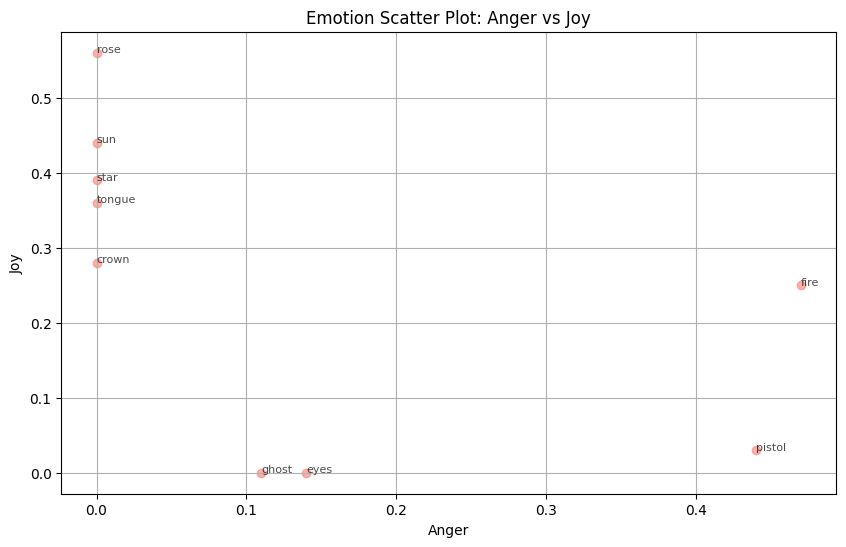

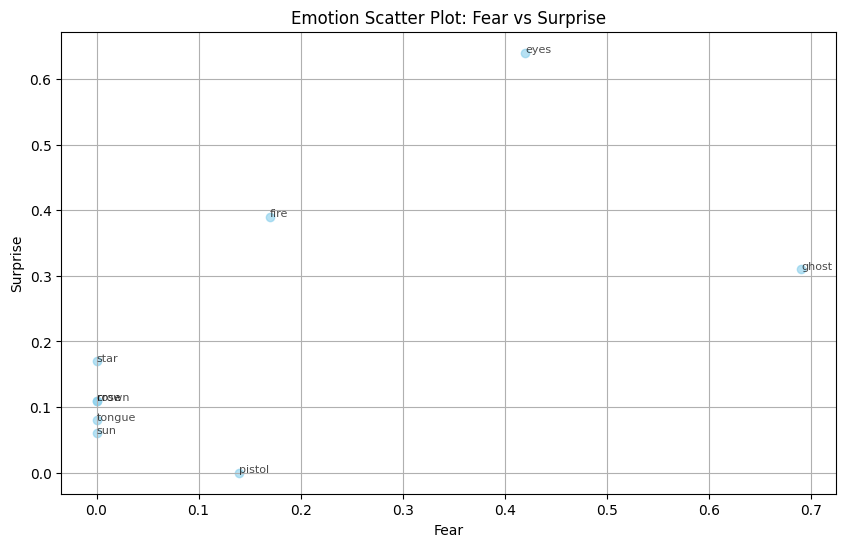

In [25]:
import matplotlib.pyplot as plt

# Plot Anger vs Joy
plt.figure(figsize=(10, 6))
plt.scatter(anger_scores, joy_scores, color="salmon", alpha=0.6)
for i, word in enumerate(anger_words):
    plt.text(anger_scores[i], joy_scores[i], word, fontsize=8, alpha=0.7)
plt.title("Emotion Scatter Plot: Anger vs Joy")
plt.xlabel("Anger")
plt.ylabel("Joy")
plt.grid(True)
plt.show()

# Plot Fear vs Surprise
plt.figure(figsize=(10, 6))
plt.scatter(fear_scores, surprise_scores, color="skyblue", alpha=0.6)
for i, word in enumerate(fear_words):
    plt.text(fear_scores[i], surprise_scores[i], word, fontsize=8, alpha=0.7)
plt.title("Emotion Scatter Plot: Fear vs Surprise")
plt.xlabel("Fear")
plt.ylabel("Surprise")
plt.grid(True)
plt.show()

### Step 6: Repeat step 5, but the emotion of each line is considered by summing up the scores of lexicon terms identified if any. So that a point representation is assigned to each line containing at least one lexicon terms

In [88]:
!pip install tabulate

In [90]:
from tabulate import tabulate

# Split the poem into lines
poem_lines = sonnets.strip().split("\n")

# Initialize a list to store line emotion scores
line_emotion_data = []

# Analyze each line
for line in poem_lines:
    # Tokenize and filter words
    line_words = set(word.lower() for word in word_tokenize(line) if word.isalpha())

    # Initialize scores for the line
    anger_score = 0
    joy_score = 0
    fear_score = 0
    surprise_score = 0

    # Check for lexicon terms and sum scores
    for word in line_words:
        if word in emotion_lexicon:
            scores = emotion_lexicon[word]
            anger_score += scores.get("anger", 0)
            joy_score += scores.get("joy", 0)
            fear_score += scores.get("fear", 0)
            surprise_score += scores.get("surprise", 0)

    # Ensure at least one score is greater than zero before adding to data
    if anger_score > 0 or joy_score > 0 or fear_score > 0 or surprise_score > 0:
        line_emotion_data.append(
            (line, anger_score, joy_score, fear_score, surprise_score)
        )

# Print the emotion values for each line in table format
print(
    tabulate(
        line_emotion_data,
        headers=["Line", "Anger", "Joy", "Fear", "Surprise"],
        tablefmt="grid",
    )
)

+-------------------------------------------------------------------------+---------+-------+--------+------------+
| Line                                                                    |   Anger |   Joy |   Fear |   Surprise |
+=========================================================================+=========+=======+========+============+
| The sailor gave to me a rose                                            |    0    |  0.56 |   0    |       0.11 |
+-------------------------------------------------------------------------+---------+-------+--------+------------+
| A rose that never would decay                                           |    0    |  0.56 |   0    |       0.11 |
+-------------------------------------------------------------------------+---------+-------+--------+------------+
| That thereby beauty's rose might never die,                             |    0    |  0.56 |   0    |       0.11 |
+-----------------------------------------------------------------------

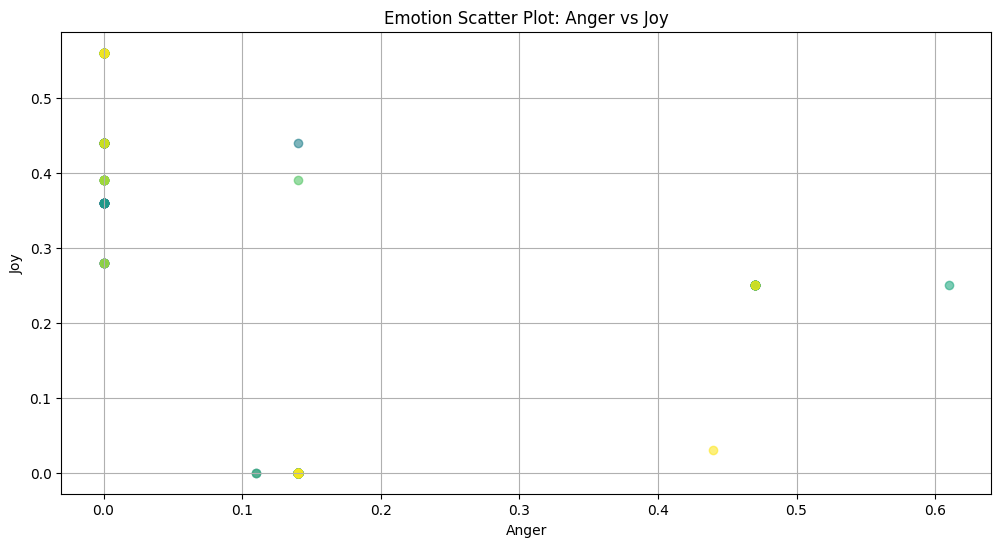

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.patches import Patch

# Split the poem into lines
poem_lines = sonnets.strip().split("\n")

# Initialize lists for storing line emotion scores
line_emotion_data = []

# Analyze each line
for line_index, line in enumerate(poem_lines):
    # Tokenize and filter words
    line_words = set(word.lower() for word in word_tokenize(line) if word.isalpha())

    # Initialize scores for the line
    anger_score = 0
    joy_score = 0
    fear_score = 0
    surprise_score = 0

    # Check for lexicon terms and sum scores
    for word in line_words:
        if word in emotion_lexicon:
            scores = emotion_lexicon[word]
            anger_score += scores.get("anger", 0)
            joy_score += scores.get("joy", 0)
            fear_score += scores.get("fear", 0)
            surprise_score += scores.get("surprise", 0)

    # If any score is greater than zero, add the line scores to the data
    if anger_score > 0 or joy_score > 0 or fear_score > 0 or surprise_score > 0:
        line_emotion_data.append(
            (line_index, line, anger_score, joy_score, fear_score, surprise_score)
        )

# Convert to separate lists for plotting
line_indices, lines, anger_scores, joy_scores, fear_scores, surprise_scores = zip(
    *line_emotion_data
)

# Generate a color map for different points
colors = plt.cm.viridis(np.linspace(0, 1, len(line_indices)))

# Create a mapping of color to line numbers
color_map = defaultdict(list)

# Create the plot
plt.figure(figsize=(12, 6))

# Draw points with different colors
for i in range(len(line_indices)):
    plt.scatter(anger_scores[i], joy_scores[i], color=colors[i], alpha=0.6)
    color_map[tuple(colors[i])].append(
        line_indices[i] + 1
    )  # Store line number (1-indexed)

plt.title("Emotion Scatter Plot: Anger vs Joy")
plt.xlabel("Anger")
plt.ylabel("Joy")
plt.grid(True)

# Prepare annotation text with colored squares
for i, (color, lines) in enumerate(color_map.items()):
    line_numbers = ", ".join(map(str, lines))
    plt.annotate(
        f"{color}: {line_numbers}",
        xy=(1.05, 0.9 - 0.05 * i),
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor=color, facecolor=color),
        ha="left",
        va="center",
    )

plt.show()

### Step 7: Explore the sentiment distribution in the poem

7.1. Use SentiWordnet to compute the overall positive and negative sentiment of each line of the poem

In [27]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet


# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith("J"):
        return wordnet.ADJ
    elif nltk_tag.startswith("V"):
        return wordnet.VERB
    elif nltk_tag.startswith("N"):
        return wordnet.NOUN
    elif nltk_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None



Compute average positive and negative sentiment for each line

In [28]:
nltk.download("sentiwordnet")
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
from nltk import pos_tag

# Split the poem into lines
lines = sonnets.split("\n")

# Initialize lists to hold average sentiment scores for each line
positive_scores = []
negative_scores = []

# Process each line
for line in lines:
    tokens = word_tokenize(line)
    pos_tags = pos_tag(tokens)  # Get POS tags for each token

    # Initialize variables to accumulate sentiment scores
    pos_total = 0
    neg_total = 0
    word_count = 0

    # Process each word and its POS tag
    for word, nltk_tag in pos_tags:
        wn_tag = get_wordnet_pos(nltk_tag)
        if (
            wn_tag is not None
        ):  # Only proceed if there's a corresponding WordNet POS tag
            synsets = list(swn.senti_synsets(word, wn_tag))
            if synsets:
                # Use the first sense as a proxy (common in NLP)
                pos_total += synsets[0].pos_score()
                neg_total += synsets[0].neg_score()
                word_count += 1

    # Calculate average sentiment scores for the line
    avg_pos = pos_total / word_count if word_count > 0 else 0
    avg_neg = neg_total / word_count if word_count > 0 else 0

    # Append results
    positive_scores.append(avg_pos)
    negative_scores.append(avg_neg)

# Display the first few positive and negative scores
print("Positive scores:", positive_scores[:5])
print("Negative scores:", negative_scores[:5])

Positive scores: [0.15625, 0.08333333333333333, 0.0, 0.0, 0.21875]
Negative scores: [0.03125, 0.041666666666666664, 0.0, 0.1, 0.09375]


7.2. Plot each line in a 2D space (positive and negative)

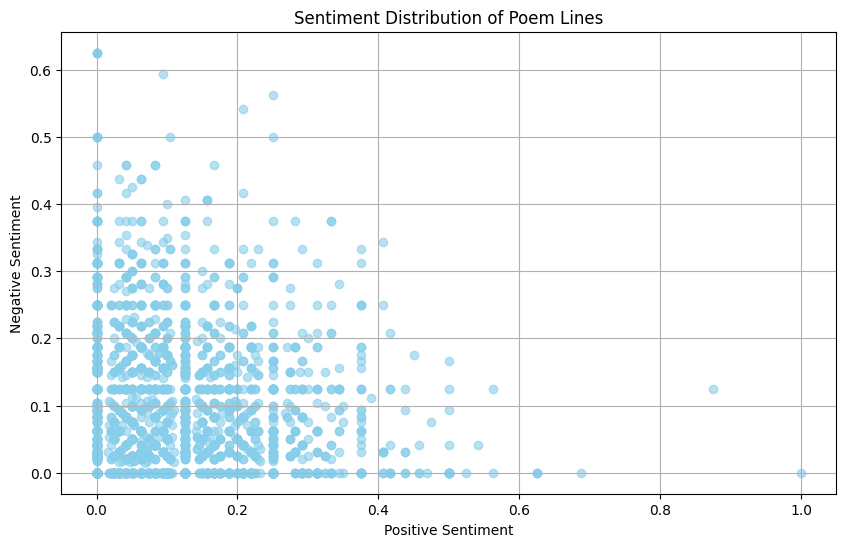

In [30]:
# Plot each line in 2D space with positive and negative scores
plt.figure(figsize=(10, 6))
plt.scatter(positive_scores, negative_scores, color="skyblue", alpha=0.6)
plt.title("Sentiment Distribution of Poem Lines")
plt.xlabel("Positive Sentiment")
plt.ylabel("Negative Sentiment")
plt.grid(True)
plt.show()

### Step 8: Explore the evolution of key-location entities with respect to emotion and sentiment

8.1. Identify the 2 most frequen location entities in the poem

In [31]:
lines = sonnets.split("\n")

location_entities = []
for line in lines:
    doc = nlp(line)
    for ent in doc.ents:
        if ent.label_ == "GPE":
            location_entities.append(ent.text)

# Get the two most frequent location entities
top_locations = Counter(location_entities).most_common(2)

# Store the top two locations
frequent_location_entities = [location for location, _ in top_locations]

print("Top location entities:", frequent_location_entities)

for location, count in top_locations:
    print(f"{location}: {count}")

Top location entities: ['Ill', 'Dublin']
Ill: 21
Dublin: 12


8.2. Calculate the emotion vector as the average value between emotion scores for all lexicon terms in the a-two token interval

In [ ]:
from collections import defaultdict

# Function to get emotion scores for a word
def get_emotion_scores(word):
    return emotion_lexicon.get(word.lower())


# Store emotion vectors for each location entity
location_emotion_vectors = defaultdict(list)

# Loop over each line and look for location entities
for line in lines:
    doc = nlp(line)
    tokens = [token.text for token in doc]

    # Identify location entities in the line
    for i, token in enumerate(tokens):
        if token in top_locations:
            # Check for emotion words in a two-token window around the location entity
            start = max(i - 2, 0)
            end = min(i + 3, len(tokens))  # +3 because range is exclusive at the end

            # Collect emotion scores within the two-token interval
            emotion_scores = []
            for j in range(start, end):
                if tokens[j].lower() in emotion_lexicon:
                    scores = get_emotion_scores(tokens[j])
                    if scores:
                        emotion_scores.append(list(scores.values()))

            # If emotion words are found, calculate the average emotion vector
            if emotion_scores:
                avg_emotion_vector = np.mean(emotion_scores, axis=0)
                location_emotion_vectors[token].append(avg_emotion_vector)

# Ensure there are emotion vectors to process
all_emotion_vectors = [
    vec for vectors in location_emotion_vectors.values() for vec in vectors
]

print(all_emotion_vectors)

[]


8.3. Dimensionality reduction with PCA to represent each of eight-dimension emotion vector in 2D dimension space and plot a graph where each of 2 location entities is represented as a point if its neighbors tokens are emotion related if any

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize PCA with two components
pca = PCA(n_components=2)


if all_emotion_vectors:
    all_emotion_vectors = np.vstack(all_emotion_vectors)
    pca_transformed = pca.fit_transform(all_emotion_vectors)

    # Mapping for plotting
    location_pca_points = {loc: [] for loc in top_locations}
    index = 0
    for loc, vectors in location_emotion_vectors.items():
        for _ in vectors:
            location_pca_points[loc].append(pca_transformed[index])
            index += 1

    # Plot the PCA-reduced emotion points
    plt.figure(figsize=(10, 6))
    for location, points in location_pca_points.items():
        points = np.array(points)
        if len(points) > 0:
            plt.scatter(points[:, 0], points[:, 1], label=location)

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("Emotion Vectors Around Location Entities")
    plt.legend()
    plt.show()
else:
    print(
        "No valid emotion data found within a two-token interval of location entities."
    )

No valid emotion data found within a two-token interval of location entities.


### Step 9: Explore poesy-like attributes including rhyme, syllabus

9.1. Install the espeak and poesy package. You can find instructions here: https://github.com/quadrismegistus/poesy/blob/master/README.md

In [57]:
!apt-get install espeak
!pip install -qU git+https://github.com/quadrismegistus/poesy
!pip install prosodic==1.6.1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak is already the newest version (1.48.15+dfsg-3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
  Preparing metadata (setup.py) ... done


In [43]:
!pip show poesy
!pip show prosodic

Name: poesy
Version: 0.3.1
Summary: Poetic processing, for Python
Home-page: https://github.com/quadrismegistus/poesy
Author: Ryan Heuser
Author-email: heuser@stanford.edu
License: MPL-2.0
Location: /root/.local/lib/python3.10/site-packages
Requires: networkx, numpy, prosodic, python-Levenshtein, scipy, tabulate
Required-by: 
Name: prosodic
Version: 1.6.1
Summary: PROSODIC: a metrical-phonological parser, written in Python. For English and Finnish, with flexible language support.
Home-page: https://github.com/quadrismegistus/prosodic
Author: Ryan Heuser
Author-email: heuser@stanford.edu
License: MPL-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: levenshtein, networkx, nltk, numpy, p-tqdm, pyparsing, Pyphen, scipy, xlrd, xlwt
Required-by: poesy


In [59]:
import prosodic


prosodic.config['en_TTS_ENGINE'] = 'espeak'

print(prosodic.config)


{'add_elided_pronunciations': 1, 'en_TTS_ENGINE': 'espeak', 'en_TTS_cache': 1, 'folder_tagged_samples': 'tagged_samples/', 'lang': 'en', 'line_headedness': 'ws', 'line_maxsylls': 60, 'linebreak': 'line', 'linelen': 60, 'maxent_gradient_norm_tolerance': 1e-06, 'maxent_max_epochs': 10000, 'maxent_negative_weights_allowed': False, 'maxent_step_size': 0.1, 'meter': <Meter.Meter object at 0x7bffc1012d40>, 'num_bounded_parses_to_store': 100, 'output': 'ipa', 'output_en': 'ipa', 'output_fi': 'orth', 'parse_maxsec': 30, 'parse_using_metrical_tree': 0, 'path_corpora': '/root/prosodic_data/corpora', 'path_meters': '/root/prosodic_data/meters', 'path_nlp_data': '/root/prosodic_data/nlp_libraries', 'path_results': '/root/prosodic_data/results', 'path_tagged_samples': '/root/prosodic_data/tagged_samples', 'print_to_screen': 0, 'resolve_optionality': 1, 'tokenizer': '[^\\s+]+', 'path_prosodic_data': '/root/prosodic_data', 'meters': {'kiparskyhanson_shakespeare': <Meter.Meter object at 0x7bffc10872e0

In [70]:
# Test creating poesy object
import poesy

# Create a Poem object by string
poem = poesy.Poem("""
When in the chronicle of wasted time
I see descriptions of the fairest wights,
And beauty making beautiful old rhyme
In praise of ladies dead and lovely knights,
Then, in the blazon of sweet beauty's best,
Of hand, of foot, of lip, of eye, of brow,
I see their antique pen would have express'd
Even such a beauty as you master now.
So all their praises are but prophecies
Of this our time, all you prefiguring;
And, for they look'd but with divining eyes,
They had not skill enough your worth to sing:
For we, which now behold these present days,
Had eyes to wonder, but lack tongues to praise.
""")
poem.summary()


  (#s,#l)  parse                                             rhyme      #feet    #syll    #parse
---------  ------------------------------------------------  -------  -------  -------  --------
     1.1   WHEN|in.the|CHRO|ni|CLE*|of|WAS|ted|TIME          a              5       10         2
     1.2   i|SEE|des|CRIP|tions|OF*|the|FAI|rest|WIGHTS      b              5       10         1
     1.3   and|BEA|uty|MA|king|BEA|u|TIFUL*|old*|RHYME       a              5       10         3
     1.4   in|PRAISE|of|LA|dies|DEAD|and|LO|vely|KNIGHTS     b              5       10         1
     1.5   THEN|in.the|BLA|zon|OF*|sweet*|BEA|utys|BEST      c              5       10         8
     1.6   of|HAND|of|FOOT|of|LIP|of|EYE|of|BROW             d              5       10         1
     1.7   i|SEE|their.an*|TIQUE.PEN*|would|HAVE|ex|PRESSD   c              4       10         5
     1.8   E|ven|SUCH*|a|BEA|uty|AS*|you|MAS|ter|NOW         d              6       11         1
     1.9   so|ALL|their|PRAI|s

In [72]:
# Run poesy summary with the Shakespeare Sonnets data
poem_SS = poesy.Poem(fn='Shakespeare Sonnets.txt')
poem_SS.summary()

  (#s,#l)  parse                                                                                rhyme      #feet    #syll    #parse
---------  -----------------------------------------------------------------------------------  -------  -------  -------  --------
   1.1     COME|all.ye|MAI|dens|YOUNG|and|FAIR                                                  a              4        8         1
   1.2     and.you|THAT|are|BLOO|ming|IN|your|PRIME                                             b              4        9         1
   1.3     AL.WAYS*|be|WARE|and|KEEP|your|GAR|den|FAIR                                          a              5       10         3
   1.4     LET|no*|MAN.STEAL*|a|WAY|your|THYME                                                  b              4        8         4
   1.5     for|THYME|it|IS|a|PRE|cious|THING                                                    -              4        8         1
   1.6     and|THYME.BRINGS*|all|THINGS|to.my|MIND                          

In [ ]:
from collections import Counter

# Extract the rhyme scheme form
rhyme_scheme = poem_SS.rhymed["rhyme_scheme_form"]  # in this case it's ababab


# Function to find frequent subsequences
def find_frequent_subsequences(seq, min_length=2):
    subseq_count = Counter()
    length = len(seq)

    for size in range(
        min_length, length // 2 + 1
    ):  # Check for lengths from min_length to half of seq
        for start in range(length - size + 1):
            subseq = seq[start : start + size]
            subseq_count[subseq] += 1

    return subseq_count


# Get the frequent subsequences
frequent_subsequences = find_frequent_subsequences(rhyme_scheme)

# Display the results
for subseq, count in frequent_subsequences.items():
    print(f"Subsequence: {subseq}, Frequency: {count}, Length: {len(subseq)}")

### Step 10: Comment on the findings